# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

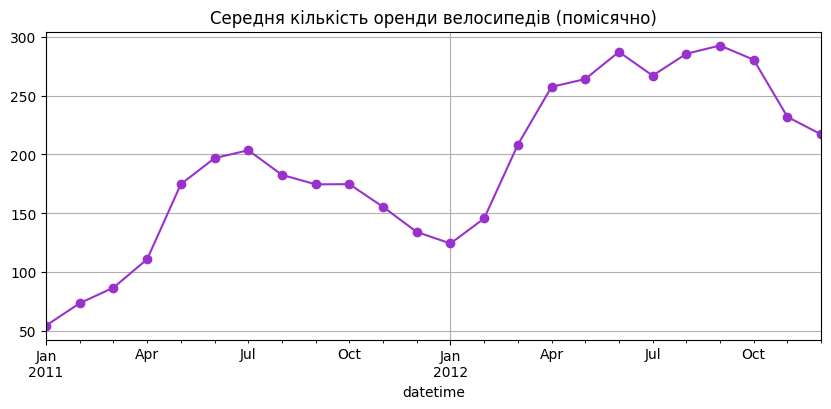

In [2]:
monthly_count = df['count'].resample('ME').mean()
monthly_count.plot(
    figsize = (10, 4),
    title = 'Середня кількість оренди велосипедів (помісячно)',
    grid = True,
    marker = 'o',
    color = 'darkorchid'
);

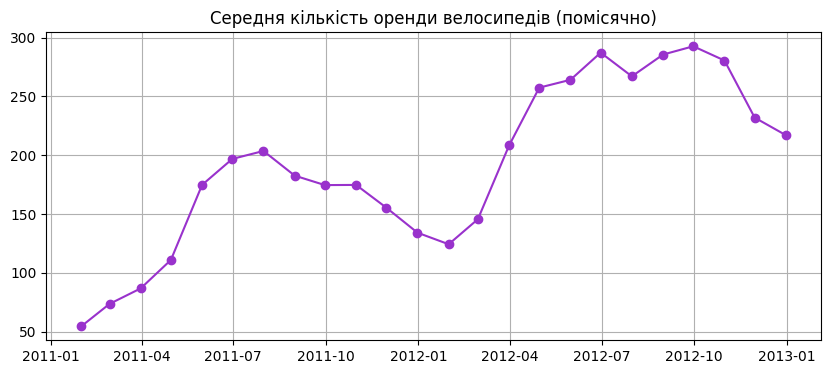

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_count, 'o-', color = 'darkorchid')
plt.title('Середня кількість оренди велосипедів (помісячно)')
plt.grid(True);

На графіках відрізняється сітка, підписи по осі Х і розташування графіка на полотні. На другому графіку чомусь не співпадають положення точок з підписами осей - кожна точка зміщена вправо на крок. 

Візуально мені більше подобається перший варіант через Pandas

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [4]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

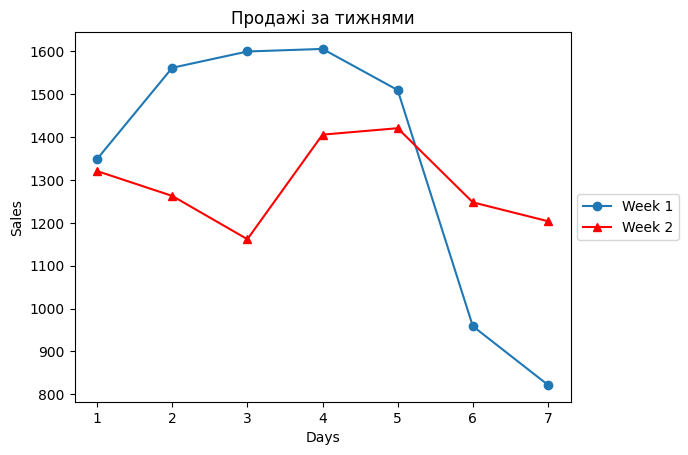

In [5]:
plt.plot(days, sales_week1, 'o-')
plt.plot(days, sales_week2, '^-', color = 'r')
plt.title('Продажі за тижнями')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend(['Week 1', 'Week 2'], loc='center left', bbox_to_anchor=(1, 0.5));

1) Судячи з графіку стабільніше продажі були в тиждень 2. 
2) Обчислити можна за допомогою стандартного відхилення - чим воно менше, тем менше коливання значень вибірки

In [6]:
print(f"Week 1 stdev: {np.std(sales_week1):.2f}")
print(f"Week 2 stdev: {np.std(sales_week2):.2f}")

Week 1 stdev: 300.00
Week 2 stdev: 90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [7]:
monthly_temp = df['temp'].resample('ME').mean()
seasons_mean = df.groupby('season')['count'].mean()

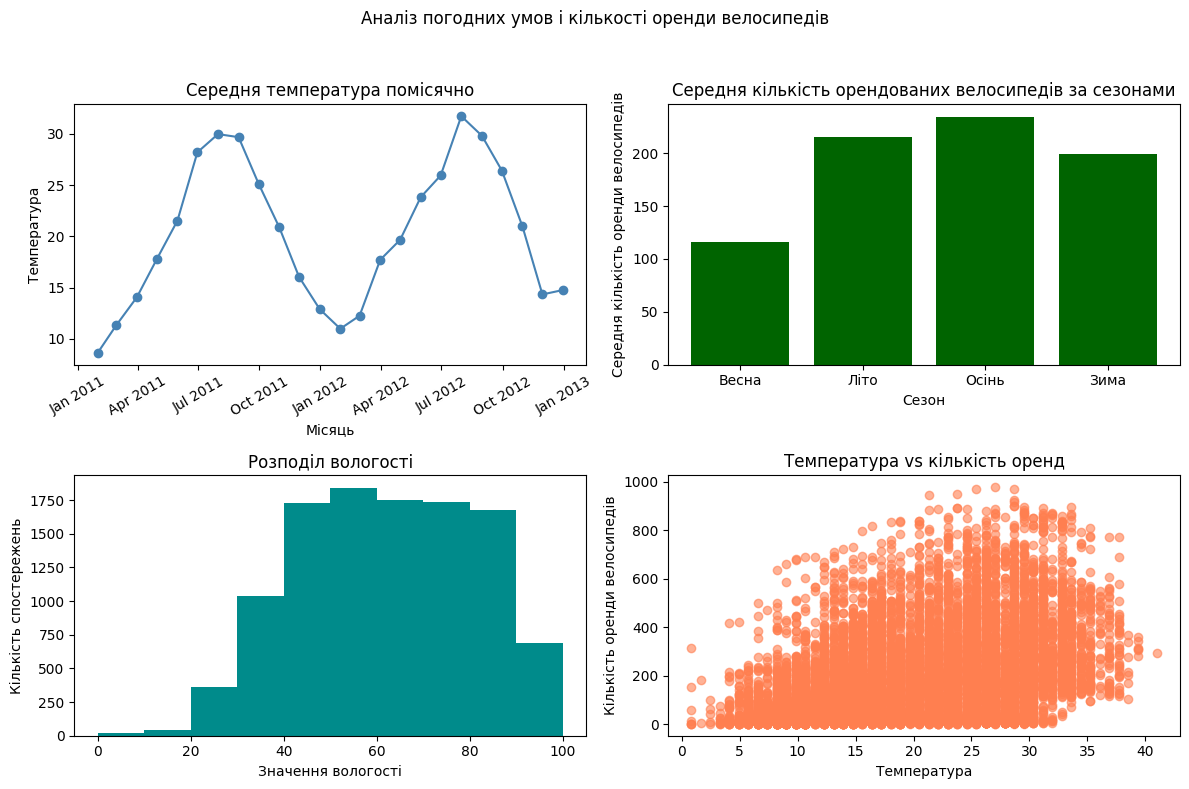

In [8]:
plt.figure(figsize=(12, 8))

# Лінійний графік середньої температури помісячно
plt.subplot(2, 2, 1)
plt.plot(monthly_temp, 'o-', color='steelblue')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=30)


# Стовпчикова діаграма середньої годинної кількості оренд за сезонами
plt.subplot(2, 2, 2)
plt.bar(['Весна', 'Літо', 'Осінь', 'Зима'], seasons_mean, color='darkgreen')
plt.title('Cередня кількість орендованих велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Cередня кількість оренди велосипедів')

# Гістограма вологості за всіма погодинними вимірами
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], color='darkcyan')
plt.title('Розподіл вологості')
plt.xlabel('Значення вологості')
plt.ylabel('Кількість спостережень')

# Scatter plot температури vs кількості оренд
plt.subplot(2, 2, 4)
plt.scatter(x = df['temp'], y = df['count'], c='coral', alpha=0.6)
plt.title('Температура vs кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренди велосипедів')

# Загальний вигляд
plt.suptitle('Аналіз погодних умов і кількості оренди велосипедів')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

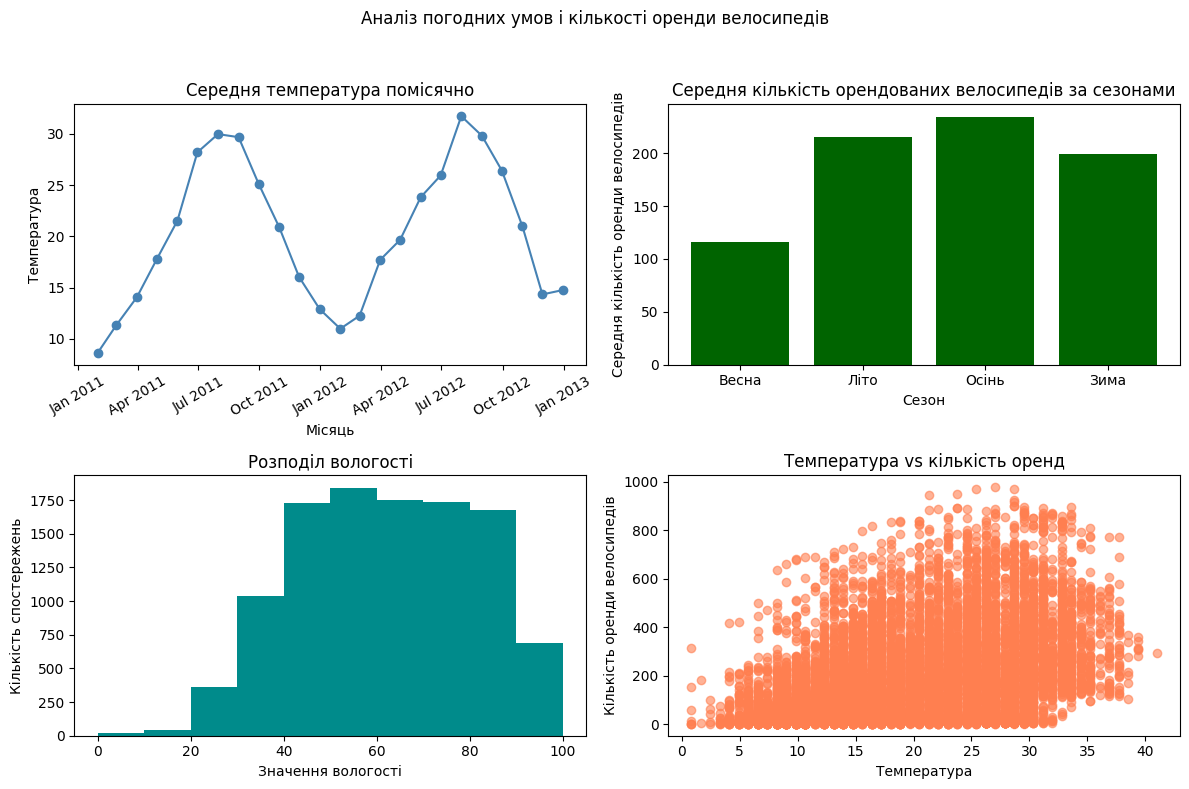

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Лінійний графік середньої температури помісячно
ax[0, 0].plot(monthly_temp, 'o-', color='steelblue')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура')
ax[0, 0].xaxis.set_major_formatter(DateFormatter('%b %Y'))
ax[0, 0].tick_params(axis='x', rotation=30)

# Стовпчикова діаграма середньої годинної кількості оренд за сезонами
ax[0, 1].bar(['Весна', 'Літо', 'Осінь', 'Зима'], seasons_mean, color='darkgreen')
ax[0, 1].set_title('Cередня кількість орендованих велосипедів за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Cередня кількість оренди велосипедів')

# Гістограма вологості за всіма погодинними вимірами
ax[1, 0].hist(df['humidity'], color='darkcyan')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Значення вологості')
ax[1, 0].set_ylabel('Кількість спостережень')

# Scatter plot температури vs кількості оренд
ax[1, 1].scatter(x = df['temp'], y = df['count'], c='coral', alpha=0.6)
ax[1, 1].set_title('Температура vs кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренди велосипедів')

# Загальний вигляд
plt.suptitle('Аналіз погодних умов і кількості оренди велосипедів')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

При використанні `plt.subplot()` для визначення розташування графіка на дашборді пишемо номер фігури, а в `plt.subplots()` її позицію в матриці, що виглядає зручнішим, якщо графіків багато. Для використання `plt.subplots()` потрібно прописувати позицію фігури кожен раз, тобто коду більше, проте є чітке розуміння до якого конкретно графіку відноситься конкретний рядок коду. Перевагою цього є можливість доступу до графіків по індексам позиції, можливість використання цього в циклах та функціях.

Так як в `plt.subplots()` полотно визначається одразу, то навіть якщо не прописати код для графіків, буде полотно з порожніми панелями під графіки розміром 1х1, а при використанні `plt.subplot()` немає порожніх панелей, а просто порожнє місце на полотні, якщо жодного графіку немає, то немає і полотна. Якщо графіків не парна кількість, то при використанні `plt.subplots()` треба докласти додаткових зусиль, щоб приховати порожню панель.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [10]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])

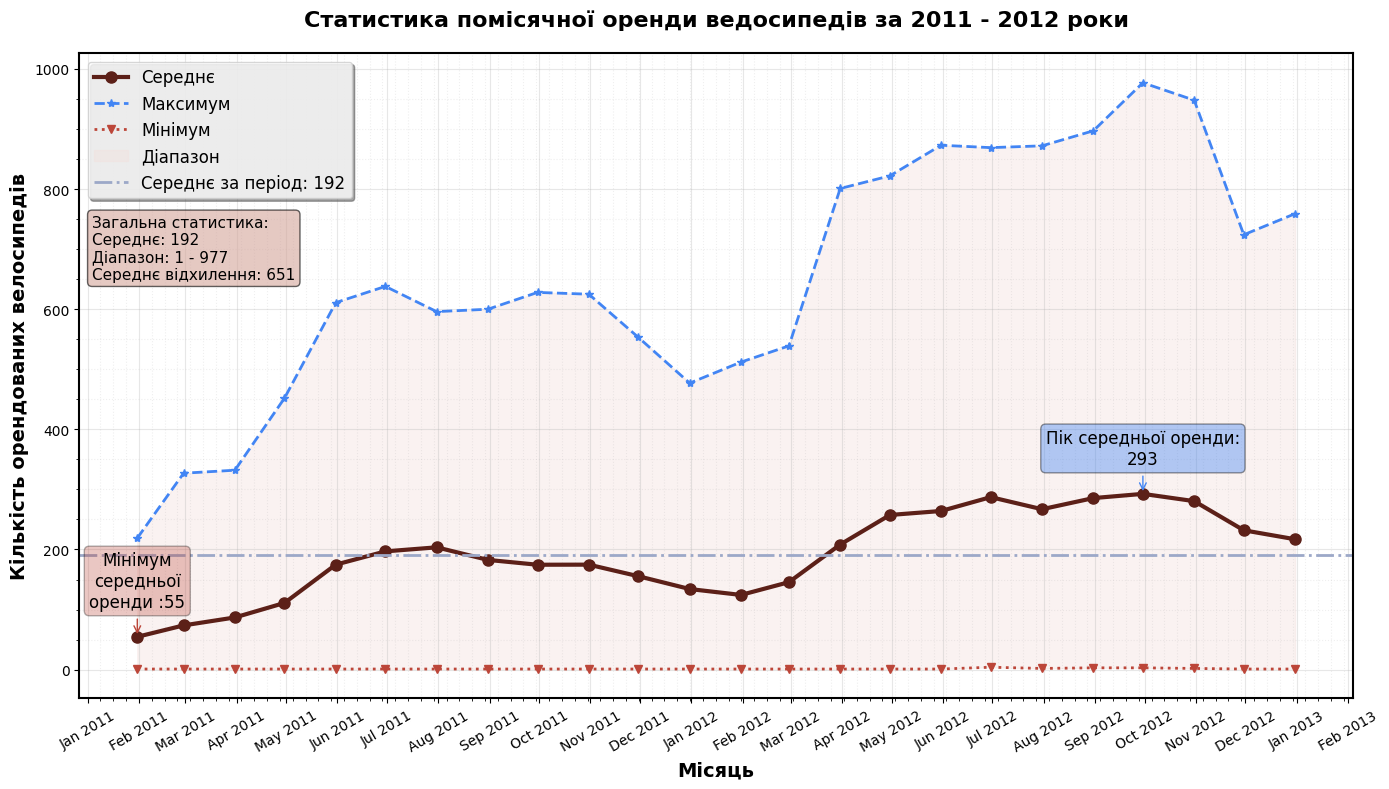

In [11]:
fig, ax = plt.subplots(figsize=(14, 8))

# Основний графік
ax.plot(monthly_stats.index, monthly_stats['mean'], '-o', linewidth=3, color='#5C2018', label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], '--*', linewidth=2,color='#4285F4', label='Максимум', markersize=6)
ax.plot(monthly_stats.index, monthly_stats['min'], ':v', linewidth=2,color='#BC4639', label='Мінімум', markersize=6)

# Заливка між max та min
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], alpha=0.4, color='#F3E0DC', label='Діапазон')

# Анотація максимум
max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Пік середньої оренди:\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='#4285F4', lw=1),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='#4285F4', alpha=0.4))

# Анотація мінімум
min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум\nсередньої\nоренди :{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', color='#BC4639', lw=1),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='#BC4639', alpha=0.3))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість орендованих велосипедів', fontsize=14, fontweight='bold')
ax.set_title('Статистика помісячної оренди ведосипедів за 2011 - 2012 роки',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_tick_params(rotation = 30)

# Сітка
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Середня лінія
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='#9ca8c8', linestyle='-.', linewidth=2,
           label=f'Середнє за період: {overall_mean:.0f}')

# Налаштування легенди
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.8)

# Додаємо текст з додатковою статистикою
textstr = f'Загальна статистика: \n'
textstr += f'Середнє: {overall_mean:.0f}\n'
textstr += f'Діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Середнє відхилення: {(monthly_stats["max"] - monthly_stats["min"]).mean():.0f}'
props = dict(boxstyle='round', facecolor='#D4A59A', alpha=0.6)
ax.text(0.01, 0.75, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()